In [9]:
import sys
sys.path.append('../../')

In [10]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
# from common.utils import  mape
from sklearn.metrics import mean_absolute_percentage_error


In [11]:
data = pd.read_csv('./NoiseRemovedData.csv', usecols=('DateTime','Noise_Removed_Volume'))


In [12]:
data.head()

,DateTime,Noise_Removed_Volume
0,2022-06-25 01:00:00,170.000
1,2022-06-25 02:00:00,170.000
2,2022-06-25 03:00:00,164.200
3,2022-06-25 04:00:00,153.560
4,2022-06-25 05:00:00,146.448


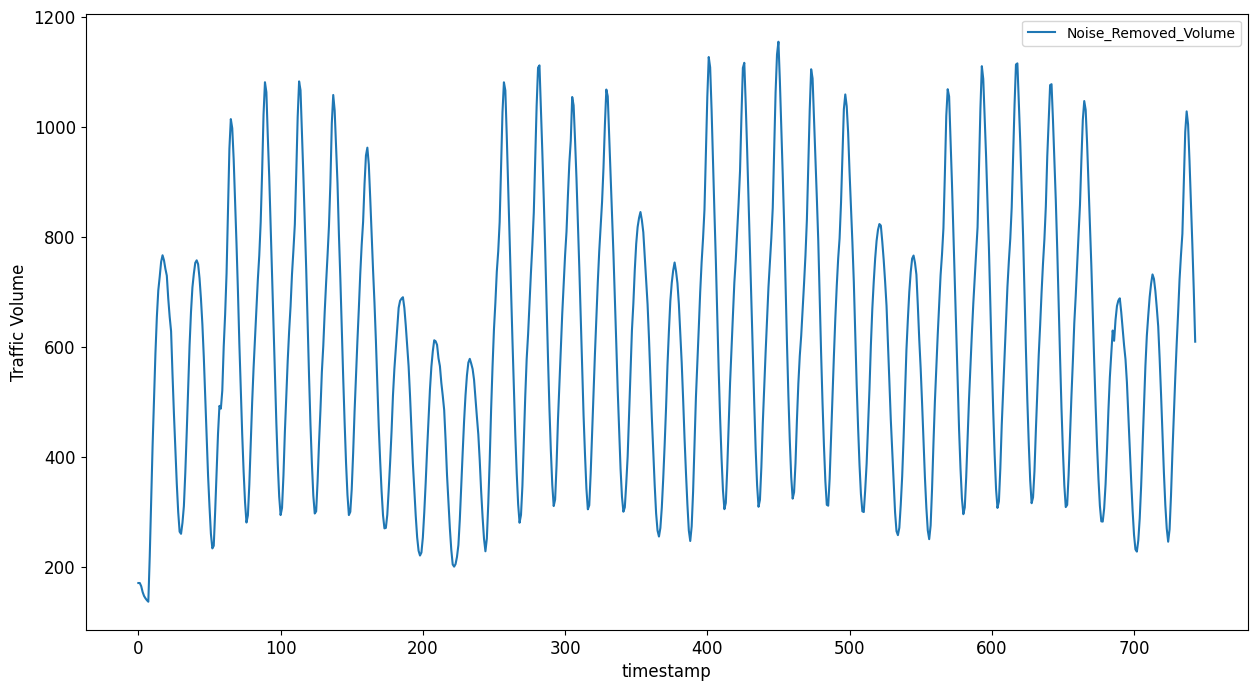

In [13]:
data.plot(y='Noise_Removed_Volume', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('Traffic Volume', fontsize=12)
plt.show()

In [14]:
data.set_index('DateTime')





,Noise_Removed_Volume
DateTime,
2022-06-25 01:00:00,170.000000
2022-06-25 02:00:00,170.000000
2022-06-25 03:00:00,164.200000
2022-06-25 04:00:00,153.560000
2022-06-25 05:00:00,146.448000
...,...
2022-07-25 20:00:00,937.970203
2022-07-25 21:00:00,864.176163
2022-07-25 22:00:00,785.940930


In [15]:
print(data.DateTime)

0      2022-06-25 01:00:00
1      2022-06-25 02:00:00
2      2022-06-25 03:00:00
3      2022-06-25 04:00:00
4      2022-06-25 05:00:00
              ...         
739    2022-07-25 20:00:00
740    2022-07-25 21:00:00
741    2022-07-25 22:00:00
742    2022-07-25 23:00:00
743    2022-07-26 00:00:00
Name: DateTime, Length: 744, dtype: object


In [16]:
data.dtypes

DateTime                 object
Noise_Removed_Volume    float64
dtype: object

In [17]:
train_start_dt = 0
test_start_dt = 521

In [18]:
train = data.copy()[(data.index >= train_start_dt) & (data.index < test_start_dt)][['Noise_Removed_Volume']]
test = data.copy()[data.index >= test_start_dt][['Noise_Removed_Volume']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

# Tried sklearn splicit here but results were notn as expected

Training data shape:  (521, 1)
Test data shape:  (223, 1)


In [19]:
scaler = MinMaxScaler()
train['Noise_Removed_Volume'] = scaler.fit_transform(train)
train.head(5)

,Noise_Removed_Volume
0,0.033402
1,0.033402
2,0.027707
3,0.017260
4,0.010277


In [20]:
test['Noise_Removed_Volume'] = scaler.transform(test)
test.head(5)


,Noise_Removed_Volume
521,0.674411
522,0.671691
523,0.643202
524,0.610592
525,0.571739


In [21]:
# Converting to numpy arrays

train_data = train.values
test_data = test.values

print(train_data)

[[0.03340174]
 [0.03340174]
 [0.02770692]
 [0.01725986]
 [0.01027683]
 [0.00606501]
 [0.00269556]
 [0.        ]
 [0.08130219]
 [0.17913828]
 [0.27861547]
 [0.35819721]
 [0.44346367]
 [0.50873124]
 [0.55583959]
 [0.58017289]
 [0.60690533]
 [0.618669  ]
 [0.60981722]
 [0.59448812]
 [0.58222484]
 [0.54158361]
 [0.50907063]
 [0.48306024]
 [0.40608918]
 [0.33567553]
 [0.27129331]
 [0.21114711]
 [0.16028092]
 [0.12508642]
 [0.12128111]
 [0.14081978]
 [0.17078597]
 [0.23049886]
 [0.30242308]
 [0.3831345 ]
 [0.45771868]
 [0.51738602]
 [0.56119243]
 [0.58563339]
 [0.60518617]
 [0.60963511]
 [0.60278648]
 [0.57767025]
 [0.54108192]
 [0.49551226]
 [0.43686636]
 [0.36717034]
 [0.29334718]
 [0.22525549]
 [0.17038938]
 [0.12119442]
 [0.09519184]
 [0.09991829]
 [0.16182594]
 [0.2302039 ]
 [0.30022338]
 [0.34975865]
 [0.34481013]
 [0.37698399]
 [0.45535112]
 [0.5131355 ]
 [0.58626613]
 [0.6979878 ]
 [0.80896619]
 [0.86181259]
 [0.84557048]
 [0.79035654]
 [0.71731852]
 [0.63885802]
 [0.55468494]
 [0.46

In [22]:
# Selecting the timesteps

timesteps=5


In [23]:
# Converting data to 2D tensor

train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape


(517, 5)

In [24]:
print(train_data_timesteps[0:5])

[[0.03340174 0.03340174 0.02770692 0.01725986 0.01027683]
 [0.03340174 0.02770692 0.01725986 0.01027683 0.00606501]
 [0.02770692 0.01725986 0.01027683 0.00606501 0.00269556]
 [0.01725986 0.01027683 0.00606501 0.00269556 0.        ]
 [0.01027683 0.00606501 0.00269556 0.         0.08130219]]


In [25]:
# Converting test data to 2D tensor

test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(219, 5)

In [26]:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(517, 4) (517, 1)
(219, 4) (219, 1)


In [27]:
# Create model using RBF kernel

model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)

In [28]:
# Fit model on training data

model.fit(x_train, y_train[:,0])

SVR(C=10, epsilon=0.05, gamma=0.5)

In [29]:
# Making predictions

# y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print( y_test_pred.shape)


(219, 1)


In [30]:
#Scaling to original form
# Scaling the predictions
# y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print( len(y_test_pred))

219


In [31]:
# Scaling the original values
# y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

print( len(y_test))

219


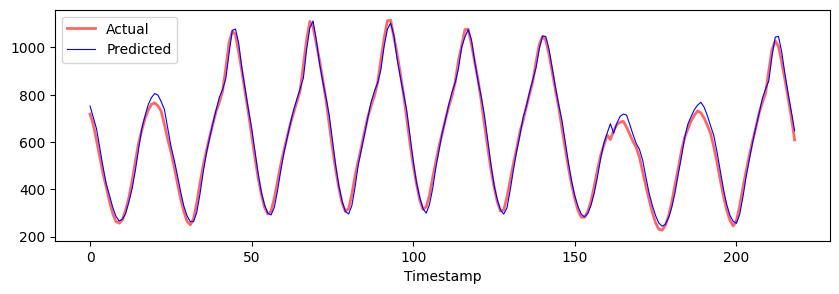

In [32]:
plt.figure(figsize=(10,3))
plt.plot( y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

Mean absolute percentage error (MAPE) measures the accuracy of the forecasting method an organization used. It represents the average of the absolute percentage errors of each entry in a dataset, showing, on average, how accurate the forecasted quantities were in comparison with the actual quantities.

In [33]:
mape = mean_absolute_percentage_error(y_test,y_test_pred , multioutput='raw_values')
print('Mean Absolute Percentage Error : ', mape*100,'%' )

Mean Absolute Percentage Error :  [4.19373217] %
